In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
import tensorflow as tf
from tensorflow import keras

2025-09-09 07:50:35.098939: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-09 07:50:35.293711: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-09 07:50:37.068168: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
df = pd.read_csv(r"/mnt/c/Rig/Pandora's BOX/DL/Datasets/Tesla_Nasdaq_Prediction.csv")

In [4]:
df.shape

(2517, 6)

In [5]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,4/8/2022,1025.49,18337900,1043.21,1048.44,1022.44
1,4/7/2022,1057.26,26482350,1052.39,1076.59,1021.54
2,4/6/2022,1045.76,29782850,1073.47,1079.00,1027.70
3,4/5/2022,1091.26,26691670,1136.30,1152.87,1087.30
4,4/4/2022,1145.45,27392570,1089.38,1149.91,1072.53


In [6]:
y = df.iloc[:,0:2]
df = df.drop(['Close/Last'], axis = 1)
print(y.head())
print(df.head())

       Date  Close/Last
0  4/8/2022     1025.49
1  4/7/2022     1057.26
2  4/6/2022     1045.76
3  4/5/2022     1091.26
4  4/4/2022     1145.45
       Date    Volume     Open     High      Low
0  4/8/2022  18337900  1043.21  1048.44  1022.44
1  4/7/2022  26482350  1052.39  1076.59  1021.54
2  4/6/2022  29782850  1073.47  1079.00  1027.70
3  4/5/2022  26691670  1136.30  1152.87  1087.30
4  4/4/2022  27392570  1089.38  1149.91  1072.53


In [7]:
df.describe()

,Volume,Open,High,Low
count,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,3.561019e+07,166.634692,170.455399,162.719750
std,2.793934e+07,270.776286,277.324411,264.008236
min,1.878980e+06,5.370000,5.370000,5.100000
25%,1.878610e+07,40.500000,41.240000,39.910000
50%,2.830952e+07,51.010000,51.760000,50.130000
75%,4.289398e+07,72.000000,73.200000,70.580000
max,3.046938e+08,1234.410000,1243.490000,1217.000000


In [8]:
y = y.set_index('Date')
y.index = pd.to_datetime(y.index, unit = 'ns')

df = df.set_index('Date')
df.index = pd.to_datetime(df.index, unit = 'ns')
y.head()

,Close/Last
Date,
2022-04-08,1025.49
2022-04-07,1057.26
2022-04-06,1045.76
2022-04-05,1091.26
2022-04-04,1145.45


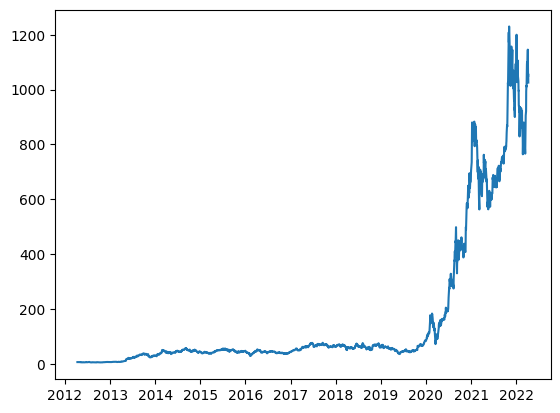

In [9]:
plt.plot(y['Close/Last'])

In [10]:
X_train = df[350:]
X_test = df[:350] 

y_train = y[350:]
y_test = y[:350]

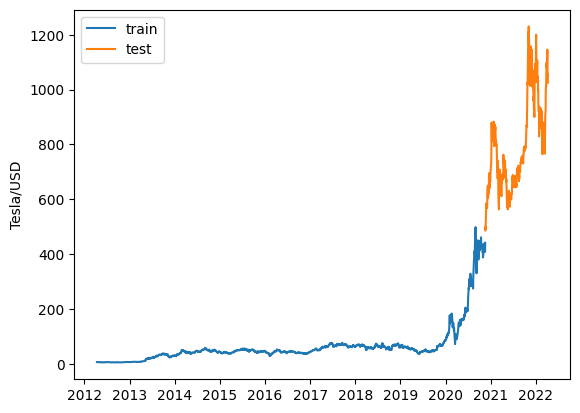

In [11]:
plt.plot(y_train['Close/Last'],label = 'train')
plt.plot(y_test['Close/Last'], label = 'test')
plt.ylabel('Tesla/USD')
plt.legend()

In [12]:
from sklearn.preprocessing import MinMaxScaler
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()

X_train = xscaler.fit_transform(X_train)
X_test = xscaler.transform(X_test)
y_train = yscaler.fit_transform(y_train)
y_test = yscaler.transform(y_test)

In [13]:
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)  

In [14]:
X_train.shape

(2167, 1, 4)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import RNN, SimpleRNNCell
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
model = Sequential()
model.add(tf.keras.Input(shape=(1, 4)))
model.add(RNN(cell = [SimpleRNNCell(256),
                      SimpleRNNCell(512),
                      SimpleRNNCell(1024)]))
model.add(Dropout(0.3))
model.add(Dense(units = 256, activation='relu'))     #try relu-tanh, relu-relu, tanh-relu, tanh-tanh
model.add(Dropout(0.4))
model.add(Dense(units = 1, activation='relu'))

I0000 00:00:1757404240.698120   58796 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rnn (RNN)                       │ (None, 1024)           │     2,034,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,297,089 (8.76 MB)

 Trainable params: 2,297,089 (8.76 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.optimizers import Adam

In [19]:
model.compile(optimizer=Adam(0.0001), loss='mse', metrics=['mae'])    

callback = EarlyStopping(monitor='mae', patience=5)

history = model.fit(X_train, y_train, batch_size=32, epochs = 30, callbacks = callback, validation_data = (X_test, y_test))

Epoch 1/30


2025-09-09 07:50:43.121326: I external/local_xla/xla/service/service.cc:163] XLA service 0x275e8530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-09 07:50:43.121351: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-09-09 07:50:43.160483: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-09 07:50:43.397527: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200
2025-09-09 07:50:43.504104: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-09 07:50:43.5041

44/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - mae: 0.0459

I0000 00:00:1757404247.857227   58885 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-09-09 07:50:49.089400: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_80', 4 bytes spill stores, 4 bytes spill loads



68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - loss: 0.0025 - mae: 0.0262 - val_loss: 0.0299 - val_mae: 0.1402
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - mae: 0.0183 - val_loss: 0.0703 - val_mae: 0.2390
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mae: 0.0173 - val_loss: 0.1015 - val_mae: 0.2943
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4353e-04 - mae: 0.0142 - val_loss: 0.0078 - val_mae: 0.0601
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4214e-04 - mae: 0.0139 - val_loss: 0.0347 - val_mae: 0.1575
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8330e-04 - mae: 0.0149 - val_loss: 0.0567 - val_mae: 0.2126
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0656e-04 - mae: 0.0147 - val_loss: 0.0356 - val_mae: 0.1630
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3924e-04 - mae: 0.0140 - val_loss: 0.0376 - val_mae: 0.1685
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8

In [21]:
pred = model.predict(X_test)
print("MAE=",mean_absolute_error(pred, y_test))
r2 = r2_score(y_test, pred)
r2*100

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
MAE= 0.06306493460147415


95.5277027260781

In [22]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mae: 0.0631 


[0.005272732116281986, 0.06306493282318115]

Need to .evaluate to see that the loss is not varying with each run. Due to dropout, r2_score seems to be varying with each run

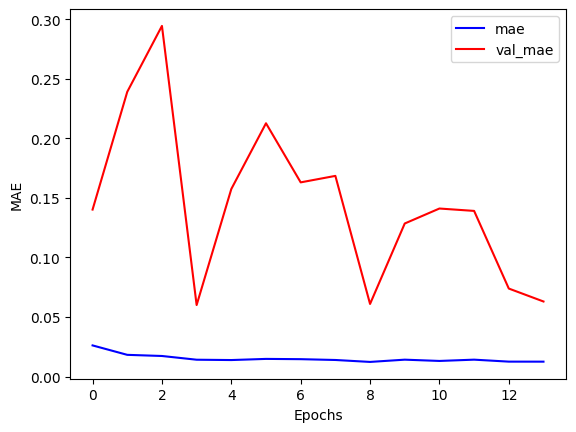

In [23]:
plt.plot(history.history['mae'],'b', label='mae')
plt.plot(history.history['val_mae'],'r',label='val_mae')
plt.ylabel("MAE")
plt.xlabel("Epochs")
plt.legend()

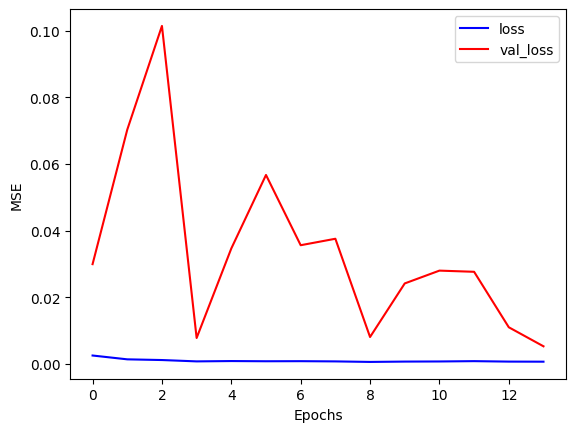

In [24]:
plt.plot(history.history['loss'],'b', label='loss')
plt.plot(history.history['val_loss'],'r',label='val_loss')
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.legend()

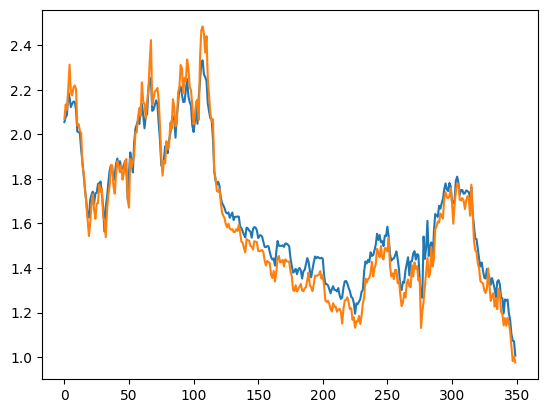

In [25]:
plt.plot(pred)
plt.plot(y_test)